In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import h5py
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

import seaborn as sns
import matplotlib.pyplot as plt

/Users/edgardocrovetto/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Cargar el archivo HDF5
with h5py.File('dataset_y_clasificacion.h5', 'r') as hdf:
    imagenes = np.array(hdf['images'])  # Cargar las imágenes
    etiquetas = np.array(hdf['classification'])  # Cargar las etiquetas (one-hot encoded)

In [4]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento (70%) y resto (30%)
X_train, X_temp, y_train, y_temp = train_test_split(imagenes, etiquetas, test_size=0.30, random_state=42)

# Dividir el resto en validación (10%) y prueba (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de validación: {X_val.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (4214, 112, 112, 3)
Tamaño del conjunto de validación: (596, 112, 112, 3)
Tamaño del conjunto de prueba: (1211, 112, 112, 3)


In [7]:
# Definir el modelo CNN con 3 capas

model_cnn_simple = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(112, 112, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
# Compilar el modelo
model_cnn_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar el resumen del modelo
model_cnn_simple.summary()

/Users/edgardocrovetto/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 110, 110, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,452,930 (9.36 MB)

 Trainable params: 2,452,930 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Entrenar el modelo
history = model_cnn_simple.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.5760 - loss: 0.6882 - val_accuracy: 0.6443 - val_loss: 0.6374
Epoch 2/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 18s 138ms/step - accuracy: 0.6109 - loss: 0.6386 - val_accuracy: 0.7282 - val_loss: 0.5415
Epoch 3/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - accuracy: 0.7096 - loss: 0.5324 - val_accuracy: 0.7416 - val_loss: 0.5024
Epoch 4/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 18s 138ms/step - accuracy: 0.7451 - loss: 0.4960 - val_accuracy: 0.7534 - val_loss: 0.4786
Epoch 5/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - accuracy: 0.7634 - loss: 0.4614 - val_accuracy: 0.7567 - val_loss: 0.4859
Epoch 6/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step - accuracy: 0.7698 - loss: 0.4446 - val_accuracy: 0.7785 - val_loss: 0.4507
Epoch 7/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.7407 - loss: 0.4898 - val_accuracy: 0.7634 - val_loss: 0.4829
Epoch 8/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.7688 - loss: 0

In [9]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model_cnn_simple.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc * 100:.2f}%")


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7942 - loss: 0.4481
Precisión en el conjunto de prueba: 78.70%


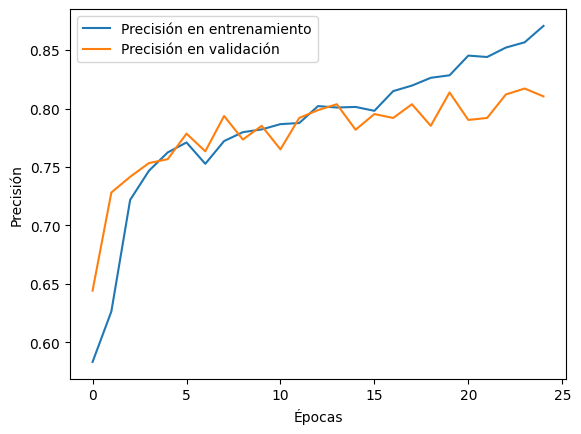

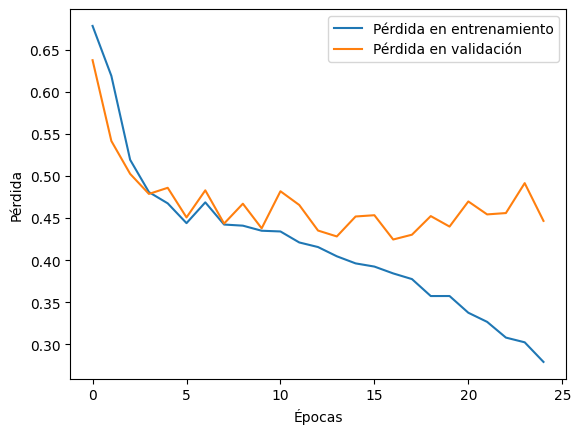

In [10]:
# Curvas de precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Curvas de pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


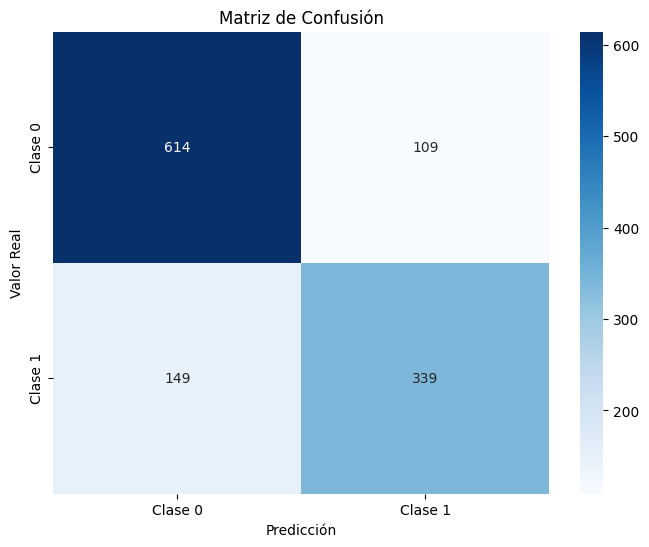

Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.80      0.85      0.83       723
     Clase 1       0.76      0.69      0.72       488

    accuracy                           0.79      1211
   macro avg       0.78      0.77      0.78      1211
weighted avg       0.79      0.79      0.79      1211



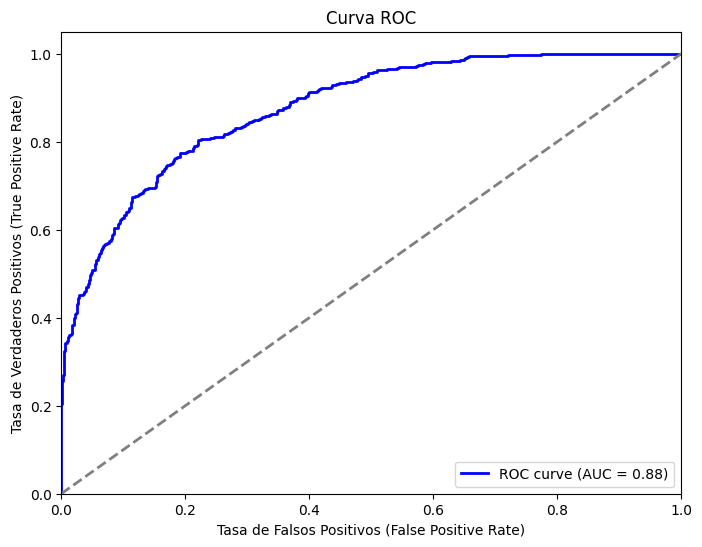

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Evaluación del modelo

# Paso 1: Predicciones con el conjunto de prueba
y_pred = model_cnn_simple.predict(X_test)

# Convertir las predicciones de one-hot encoding a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Paso 2: Calcular la Matriz de Confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Visualizar la matriz de confusión usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Paso 3: Reporte de Clasificación
print("Reporte de Clasificación:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=["Clase 0", "Clase 1"]))

# Paso 4: Curva ROC y AUC-ROC
# Calcular las probabilidades de la clase positiva (Clase 1)
y_pred_proba = y_pred[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true_classes, y_pred_proba)

# Calcular el AUC (Área bajo la curva)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Tasa de Verdaderos Positivos (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


In [11]:
from tensorflow.keras.regularizers import l2

# En la capa completamente conectada, agregar regularización L2
model_cnn_simple2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(112, 112, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compilar el modelo, disminuyendo laa tasa de aprendizaje
optimizer = Adam(learning_rate=0.0001)  # Disminuir la tasa de aprendizaje
model_cnn_simple2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Mostrar el resumen del modelo
model_cnn_simple2.summary()



/Users/edgardocrovetto/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 110, 110, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,452,930 (9.36 MB)

 Trainable params: 2,452,930 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Entrenar el modelo
history = model_cnn_simple2.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - accuracy: 0.5653 - loss: 0.7555 - val_accuracy: 0.6309 - val_loss: 0.6334
Epoch 2/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - accuracy: 0.6513 - loss: 0.6343 - val_accuracy: 0.6644 - val_loss: 0.6004
Epoch 3/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - accuracy: 0.6850 - loss: 0.5949 - val_accuracy: 0.7198 - val_loss: 0.5472
Epoch 4/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.6918 - loss: 0.5769 - val_accuracy: 0.7332 - val_loss: 0.5226
Epoch 5/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.7187 - loss: 0.5337 - val_accuracy: 0.7567 - val_loss: 0.5238
Epoch 6/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.7275 - loss: 0.5214 - val_accuracy: 0.7550 - val_loss: 0.5172
Epoch 7/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.7385 - loss: 0.5215 - val_accuracy: 0.7567 - val_loss: 0.5097
Epoch 8/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 19s 148ms/step - accuracy: 0.7575 - loss: 0

In [13]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model_cnn_simple2.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc * 100:.2f}%")


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7746 - loss: 0.4494
Precisión en el conjunto de prueba: 77.79%


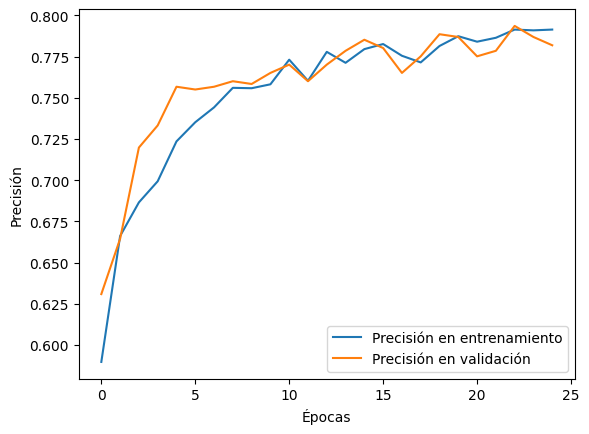

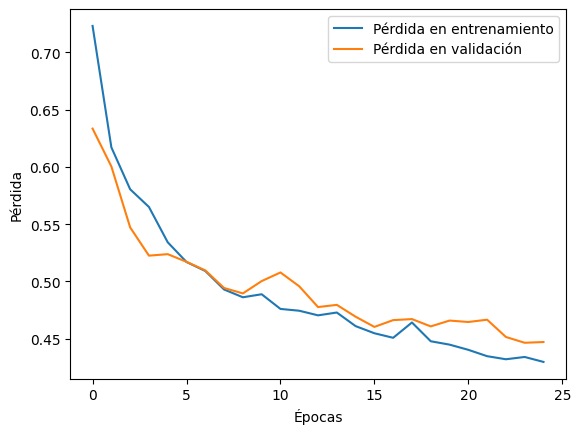

In [14]:
# Curvas de precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Curvas de pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

Se observa una clara mejora tras agregar regularización L2 y disminuir la tasa de aprendizaje.

Observaciones:

Gráfico de Precisión:
La precisión de validación y entrenamiento se mantienen bastante alineadas, lo cual indica que el modelo no está sobreajustando, o al menos lo hace mucho menos que antes.
Hay fluctuaciones en la curva de validación, pero es normal hasta cierto punto. Esto sugiere que el modelo está capturando bien la variabilidad de los datos, aunque se podría intentar más ajuste para reducir esas pequeñas oscilaciones.

Gráfico de Pérdida:
La pérdida ha disminuido de manera consistente tanto en el conjunto de entrenamiento como en el de validación. Esto indica que el modelo ha convergido bien sin caer en un claro sobreajuste.
La pérdida en validación sigue algo más alta que la pérdida de entrenamiento, lo cual es normal pero podría reducirse aún más con data augmentation o añadiendo más datos al conjunto de entrenamiento.

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


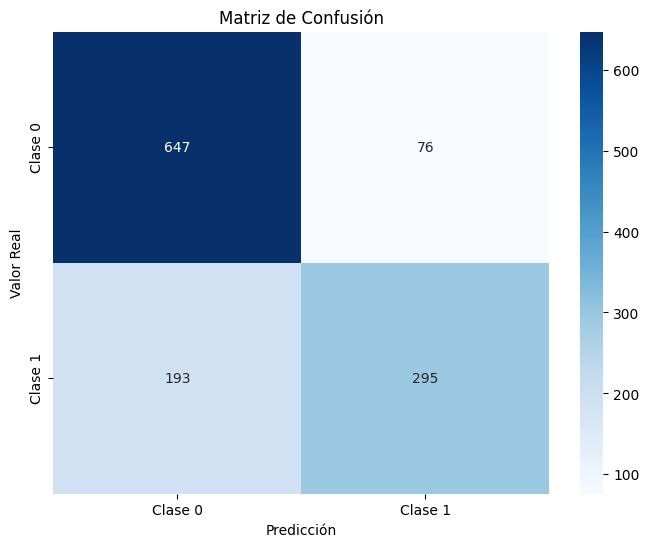

Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.77      0.89      0.83       723
     Clase 1       0.80      0.60      0.69       488

    accuracy                           0.78      1211
   macro avg       0.78      0.75      0.76      1211
weighted avg       0.78      0.78      0.77      1211



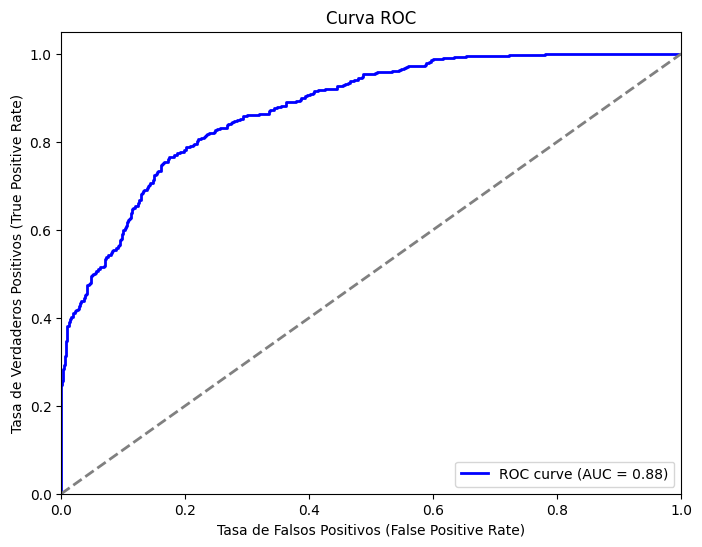

In [21]:

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Evaluación del modelo

# Paso 1: Predicciones con el conjunto de prueba
y_pred = model_cnn_simple2.predict(X_test)

# Convertir las predicciones de one-hot encoding a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Paso 2: Calcular la Matriz de Confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Visualizar la matriz de confusión usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Paso 3: Reporte de Clasificación
print("Reporte de Clasificación:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=["Clase 0", "Clase 1"]))

# Paso 4: Curva ROC y AUC-ROC
# Calcular las probabilidades de la clase positiva (Clase 1)
y_pred_proba = y_pred[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true_classes, y_pred_proba)

# Calcular el AUC (Área bajo la curva)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Tasa de Verdaderos Positivos (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
